In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt 
from shapely.ops import unary_union, cascaded_union

In [2]:
df = gpd.read_file("C:/repos/satellite-images-nso/input_data/natura2000_solleveld&kapittelduinen.json")

In [3]:
df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
georegion = "Yes"
buffered_georegion = "noe"

In [18]:
buffered_georegion if buffered_georegion else georegion 

'noe'

In [4]:
df = df.to_crs("EPSG:28992")

In [94]:
for x in range(0,100):
    print("-----------")
    df['geometry'] = unary_union(df['geometry'].buffer(x))
    if df.geometry.iloc[0].geom_type == "Polygon":
        break

-----------
-----------
-----------
-----------
-----------
-----------
-----------
-----------
-----------


In [ ]:
df = df.to_crs("EPSG:4326")

In [89]:
df.to_file("natura2000_solleveld&kapittelduinen_buffered.json", driver="GeoJSON")

# Crop from the bigger region

In [11]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd
from shapely.geometry import mapping

# Read the GeoJSON file to get the cropping extent
geojson_file = 'natura2000_solleveld&kapittelduinen.json'
gdf = gpd.read_file(geojson_file)
gdf = gdf.to_crs("EPSG:28992")
geometry = gdf.geometry.values[0]
geojson_geom = [mapping(geometry)]

# Open the GeoTIFF file using Rasterio
tiff_file = 'E:/data/test/20230315_105623_PNEO-04_1_21_30cm_RD_12bit_RGBNED_HoekVanHolland_natura2000_solleveld&kapittelduinen_buffered_cropped.tif'
with rasterio.open(tiff_file) as src:
    # Crop the GeoTIFF using the extent from the GeoJSON
    out_image, out_transform = mask(src, geojson_geom, crop=True)

    # Get metadata from the original GeoTIFF file
    out_meta = src.meta.copy()

    # Update metadata for the cropped GeoTIFF
    out_meta.update({"driver": "GTiff",
                     "height": out_image.shape[1],
                     "width": out_image.shape[2],
                     "transform": out_transform})

    # Save the cropped GeoTIFF
    cropped_tiff_file = 'E:/data/test/20230315_105623_PNEO-04_1_21_30cm_RD_12bit_RGBNED_HoekVanHolland_natura2000_solleveld&kapittelduinen_cropped.tif'
    with rasterio.open(cropped_tiff_file, "w", **out_meta) as dest:
        dest.write(out_image)

In [1]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd
from shapely.geometry import mapping

# Read the GeoJSON file to get the cropping extent
geojson_file = 'natura2000_solleveld&kapittelduinen.json'
gdf = gpd.read_file(geojson_file)
gdf = gdf.to_crs("EPSG:28992")
geometry = gdf.geometry.values[0]

In [5]:
[mapping(geometry)]

[{'type': 'MultiPolygon',
  'coordinates': [(((70827.298422173, 444160.2543127828),
     (70837.19002583882, 444155.9702086731),
     (70858.96924286662, 444147.5909641518),
     (70861.2268611573, 444146.9965128106),
     (70882.7276180381, 444138.3995125518),
     (70927.86709997882, 444125.73217201856),
     (70944.7028929582, 444121.66514408274),
     (70983.86659662501, 444113.2162456355),
     (71025.36801077204, 444104.8396004526),
     (71051.42250743182, 444101.39677557297),
     (71167.35217548127, 444081.19854979054),
     (71248.94343306417, 444066.25281463406),
     (71316.25340100074, 444051.99297485925),
     (71316.9385169654, 444051.8702095869),
     (71334.48078390791, 444053.02271345997),
     (71406.29851035218, 444057.605729247),
     (71453.90273771313, 444060.7033290524),
     (71485.47607368349, 444062.623001423),
     (71499.02074118618, 444063.06403448846),
     (71507.60612539462, 444062.80912332213),
     (71513.24308037497, 444062.93738019676),
     (71519.

# Other stuff

In [32]:
df[df['naam_n2k'] == "Solleveld & Kapittelduinen"]

,naam_n2k,vhn_new,nr,beschermin,sitecode_v,sitecode_h,status,kadaster,staatscour,FID,Code,Provincien,SHAPE_Leng,SHAPE_Area,geometry
24,Solleveld & Kapittelduinen,2,99,HR,None,NL1000016,"Natura 2000-besluit 2011, wijzigingsbesluit 30...",OZ4 61814/130,2011/17585,8,28,Zuid-Holland,6.564802,0.385741,"MULTIPOLYGON (((4.16200 51.97946, 4.16215 51.9..."


C:\Users\pzhadmin\AppData\Local\Temp\2\ipykernel_11312\1154867744.py:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df[df['naam_n2k'] == "Solleveld & Kapittelduinen"]['geometry'].explode()[4:5].plot()


<Axes: >

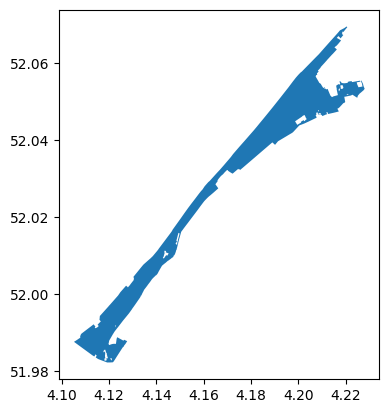

In [41]:
df[df['naam_n2k'] == "Solleveld & Kapittelduinen"]['geometry'].explode()[4:5].plot()

<Axes: >

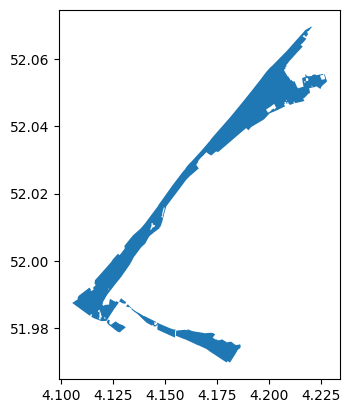

In [34]:
df[df['naam_n2k'] == "Solleveld & Kapittelduinen"]['geometry'].plot()

In [5]:
df.to_file("N2000_pzh.json", driver="GeoJSON")

In [14]:
df[df['naam_n2k'] == "Solleveld & Kapittelduinen"].to_file("natura2000_solleveld&kapittelduinen.json", driver="GeoJSON")

In [7]:
import rasterio
import numpy as np
from rasterio.plot import show

In [2]:
import glob
import pandas  as pd

In [7]:
pd.DataFrame([file.replace("\\","/") for file in glob.glob("E:/data/*/*cropped*.tif")],columns=["Path"])

,Path
0,E:/data/coepelduynen/20190302_105726_SV1-01_50...
1,E:/data/coepelduynen/20190302_105726_SV1-01_50...
2,E:/data/coepelduynen/20190302_105829_SV1-01_50...
3,E:/data/coepelduynen/20190302_105829_SV1-01_50...
4,E:/data/coepelduynen/20190308_111644_SV1-01_50...
...,...
99,E:/data/waterleidingduinen/20190729_111526_SV1...
100,E:/data/waterleidingduinen/20190729_111526_SV1...
101,E:/data/waterleidingduinen/20200304_114559_SV1...
102,E:/data/waterleidingduinen/20200323_112113_SV1...


In [5]:
raster_path_cropped = "E:/data/coepelduynen/20200304_114601_SV1-02_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_ndvi_height.tif"

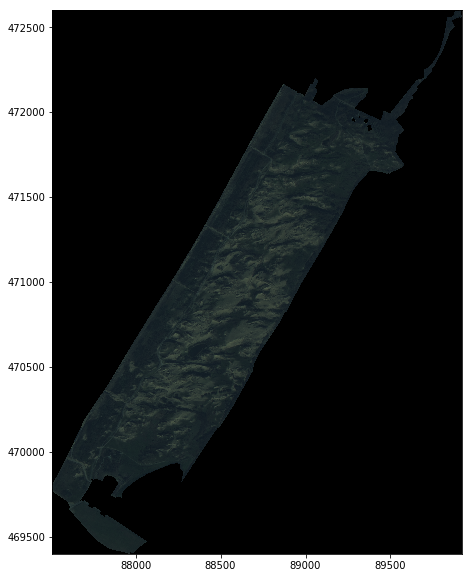

In [8]:
src = rasterio.open(raster_path_cropped)
plot_out_image = np.clip(src.read()[2::-1],
                        0,2200)/2200 # out_image[2::-1] selects the first three items, reversed

plt.figure(figsize=(10,10))
rasterio.plot.show(plot_out_image,
            transform=src.transform)
plt.show()

In [10]:
df[df['naam_n2k'] == "Solleveld & Kapittelduinen"].explode().to_file("natura2000_solleveld&kapittelduinen.json", driver="TopoJSON")

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  """Entry point for launching an IPython kernel.


DriverError: unsupported mode: 'w'

In [2]:
# Plotting shape files.

import geopandas as gpd
import pandas as pd

c:\ProgramData\Anaconda3\lib\site-packages\geopandas\_compat.py:115: UserWarning: The Shapely GEOS version (3.4.3-CAPI-1.8.3 r4285) is incompatible with the GEOS version PyGEOS was compiled with (3.10.0-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [28]:
import glob
import pandas as pd


df = pd.DataFrame([file.replace("\\","/") for file in glob.glob("E:/output/*/*cluster*.shp")],columns=["Path"])
df['Path2'] = [file.replace("\\","/") for file in glob.glob("E:/output/*/*cluster*.shp")]
print(df)

,Path,Path2
0,E:/output/Coepelduynen_segmentations/20190302_...,E:/output/Coepelduynen_segmentations/20190302_...
1,E:/output/Coepelduynen_segmentations/20190302_...,E:/output/Coepelduynen_segmentations/20190302_...
2,E:/output/Coepelduynen_segmentations/20190308_...,E:/output/Coepelduynen_segmentations/20190308_...
3,E:/output/Coepelduynen_segmentations/20190422_...,E:/output/Coepelduynen_segmentations/20190422_...
4,E:/output/Coepelduynen_segmentations/20190601_...,E:/output/Coepelduynen_segmentations/20190601_...
5,E:/output/Coepelduynen_segmentations/20191025_...,E:/output/Coepelduynen_segmentations/20191025_...
6,E:/output/Coepelduynen_segmentations/20191130_...,E:/output/Coepelduynen_segmentations/20191130_...
7,E:/output/Coepelduynen_segmentations/20191202_...,E:/output/Coepelduynen_segmentations/20191202_...
8,E:/output/Coepelduynen_segmentations/20200304_...,E:/output/Coepelduynen_segmentations/20200304_...
9,E:/output/Coepelduynen_segmentations/20200304_...,E:/output/Coepelduynen_segmentations/20200304_...


In [21]:
df.values[3][0]

'E:/output/Coepelduynen_segmentations/20190422_111335_SV1-01_50cm_RD_11bit_RGBI_Oegstgeest_natura2000_coepelduynen_cropped_ndvi_height_normalised_cluster_model.shp'

In [4]:
gdf = gpd.read_file(df.values[1][0])
gdf['area'] = gdf['geometry'].to_crs({'init': 'epsg:3395'}).map(lambda p: p.area / 10**3)
gdf['perimeter'] =gdf['geometry'].to_crs({'init': 'epsg:3395'}).map(lambda p: p.length)

c:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
c:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [8]:
gdf2 = gpd.read_file(df.values[2][0])
gdf2['area'] = gdf2['geometry'].to_crs({'init': 'epsg:3395'}).map(lambda p: p.area / 10**3)
gdf2['perimeter'] =gdf2['geometry'].to_crs({'init': 'epsg:3395'}).map(lambda p: p.length)

c:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
c:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [10]:
gdf['diff'] = gdf['area']-gdf2['area']

In [11]:
gdf['diff']

,label,geometry,area,perimeter,diff
0,Bos,"MULTIPOLYGON (((88428.000 470076.000, 88426.00...",23.281379,5012.189255,-17.566747
1,Hoog gras,"MULTIPOLYGON (((87668.000 469598.000, 87668.00...",184.275528,114728.500245,-152.329464
2,Laag gras,"MULTIPOLYGON (((87686.000 469576.000, 87688.00...",518.874034,112587.668648,-490.987103
3,Struweel,"MULTIPOLYGON (((87814.000 469452.000, 87812.00...",322.117741,72546.984649,-100.920140
4,Water of Overig,"MULTIPOLYGON (((87718.000 469538.000, 87720.00...",2651.915572,348278.648524,1016.230662
5,Zand,"MULTIPOLYGON (((87638.000 469630.000, 87636.00...",1326.862917,151095.104076,-254.957995


In [51]:
gdf.area

0      22564.0
1     270868.0
2    1048384.0
3     229600.0
4       5672.0
5     317956.0
dtype: float64

In [26]:
gdf['label'] = gdf['label'].astype(str)

In [29]:
gdf['label'].unique()

array(['Bos', 'Hoog gras', 'Laag gras', 'Struweel', 'Water of Overig',
       'Zand'], dtype=object)

In [62]:
gdf['area'] = gdf['geometry'].to_crs({'init': 'epsg:3395'}).map(lambda p: p.area / 10**3)
gdf['perimeter'] =gdf['geometry'].to_crs({'init': 'epsg:3395'}).map(lambda p: p.length)


c:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
c:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [16]:
gdf['diff'].plot(color=gdf['colour'])

In [12]:
color_mapping = {"Bos": "forestgreen", "Hoog gras": "green", "Laag gras":"lime","Struweel":"darkgreen","Water of Overig":"blue","Zand":"yellow" }

In [17]:
import matplotlib.pyplot as plt 
gdf['colour'] = gdf["label"].map(color_mapping)


In [25]:
gdf.index = gdf['label']

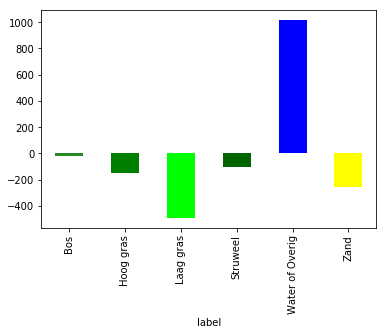

In [26]:
from matplotlib.pyplot import xlabel


gdf['diff'].plot(kind="bar",color=gdf['colour'])
plt.show()



<Figure size 7200x7200 with 0 Axes>

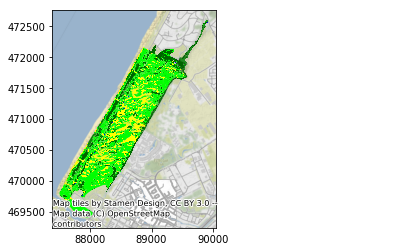

In [41]:

plt.figure(figsize=(100,100))
color_mapping = {"Bos": "forestgreen", "Hoog gras": "green", "Laag gras":"lime","Struweel":"darkgreen","Water of Overig":"blue","Zand":"yellow" }
ax = gdf.plot(color=gdf["label"].map(color_mapping))
cx.add_basemap(ax, crs=gdf.crs)
plt.show()

AttributeError: Unknown property column

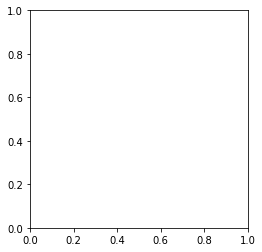

In [28]:
ax = gdf['geometry'].plot(column='label',categorical=True)
cx.add_basemap(ax, crs=gdf.crs)
plt.show()


In [35]:
text_file = open("C:/Users/pzhadmin/Desktop/path_seg2.txt", "r")

In [36]:
text = text_file.readlines()[0]

In [38]:
text[0]

'E:/output/Coepelduynen_segmentations/20200625_112015_SV1-03_SV_RD_11bit_RGBI_50cm_Rijnsburg_natura2000_coepelduynen_cropped_ndvi_height_normalised_cluster_model.shp'